# Binary Search Trees

### Review **tree** terminology:
- **root**: any node with no parents
- **leaf**: any node with no children
- **tree**: DAG (directed acyclic graph) with exactly one **root** node and all other nodes have exactly one parent

In [1]:
from graphviz import Graph, Digraph
import random
import math

### Is this a tree? If not, how do we make it into a tree?

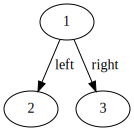

In [2]:
g = Digraph()
g.edge("1", "2", label="left")
g.edge("1", "3", label="right")
g

### Special cases of trees
- **Linked list**: a tree, where each node has *at most* one child
- **Binary tree**:  a tree, where each has *at most* two children

### Review: recursive functions
1. *Category 1*: functions that do some action (for example: printing, appending, etc.,)
2. *Category 2*: functions that return some computation

## Binary tree

In [3]:
# TODO: define Node class
class Node:
    def __init__(self, label):
        self.label = label
        self.left = None
        self.right = None
    

    # Category 1: functions that do some action
    def dump(self, prefix="", suffix=""):
        """
        prints out name of every node in the tree with some basic formatting
        """
        # TODO: what is the simplest example in this case?
        print(prefix, self.label, suffix)
        # recurse left
        if self.left != None:
            self.left.dump(prefix+"\t", "(LEFT)")
        # recurse right
        if self.right != None:
            self.right.dump(prefix+"\t", "(RIGHT)")
            
    # Category 2: functions that return some computation
    def search(self, target):
        """
        returns True/False, if target is somewhere in the tree
        """
        if target == self.label:
            return True

        if self.left != None:
            if self.left.search(target):
                return True
        
        if self.right != None:
            if self.right.search(target):
                return True
        
        return False

node1 = Node(1)
node2 = Node(2)
node3 = Node(3)
node4 = Node(4)
node1.left = node2
node1.right = node3
node2.left = node4
node1.dump()

 1 
	 2 (LEFT)
		 4 (LEFT)
	 3 (RIGHT)


### Let's come up with testcases for `search(...)`

In [4]:
print(node1.search(1)) # should be True
print(node1.search(2)) # should be True
print(node1.search(3)) # should be True
print(node1.search(4)) # should be True
print(node1.search(5)) # should be False

True
True
True
True
False


#### How many times is search(...) called, in the worst case?  
- Assume tree has *N* nodes.  
- Complexity is: **O(N)**

### Code folding notebook extension

- Go to "jupyterlab" > "Settings" > "Advanced Settings Editor" > "Notebook" > "Rulers" > enable "Code Folding" (there should be three such settings).

## Binary Search Tree

- special case of *Binary trees*
- **BST rule**: any node's value is bigger than every value in its left subtree, and smaller than every value in its right subtree
- TODO: write a method to add values to a BST, while preserving the BST rule
- TODO: modify the search method of binary tree to make it suitable for BST (better complexity than O(N)
- TODO: write a method to find height of a BST

In [5]:
class BSTNode:
    def __init__(self, label):
        self.label = label
        self.left = None
        self.right = None
    
    # Category 1: functions that do some action
    def dump(self, prefix="", suffix=""):
        """
        prints out name of every node in the tree with some basic formatting
        """
        print(prefix, self.label, suffix)
        if self.left != None:
            self.left.dump(prefix+"\t", "(LEFT)")
        if self.right != None:
            self.right.dump(prefix+"\t", "(RIGHT)")
            
    # Category 2: functions that return some computation
    def search(self, target):
        """
        returns True/False, if target is somewhere in the tree
        """
        if target == self.label:
            return True
        elif target < self.label:
            if self.left != None:
                if self.left.search(target):
                    return True
        elif target > self.label:
            if self.right != None:
                if self.right.search(target):
                    return True
        
        return False
    
    def add(self, label):
        """
        Finds the correct spot for label and adds a new node with it.
        Assumes that tree already contains at least one node -> TODO: discuss why?
        Raises ValueError if label is already on the tree.
        """
        if label < self.label:
            # go left
            if self.left == None:
                self.left = BSTNode(label)
            else:
                # recurse left
                self.left.add(label)
        elif label > self.label:
            # go right
            if self.right == None:
                self.right = BSTNode(label)
            else:
                # recurse right
                self.right.add(label)
        else:
            raise ValueError(f"{label} is already a node on the tree!")
            

    def height(self):
        """
        Calculates height of the BST.
        Height: the number of nodes on the longest root-to-leaf path (including the root)
        """
        if self.left == None:
            l = 0
        else:
            # recurse left
            l = self.left.height()
            
        if self.right == None:
            r = 0
        else:
            # recurse right
            r = self.right.height()
            
        return max(l, r)+1

### Does this tree satisfy BST rule? If not, which node violates it and how can we fix its position?
- Let's not displace other children node to find a new spot for the node in violation of BST rule.

In [6]:
root = BSTNode(10)
root.left = BSTNode(2)
root.left.left = BSTNode(1)
root.left.right = BSTNode(4)
root.left.right.left = BSTNode(3)
root.right = BSTNode(15)
root.right.left = BSTNode(12)
root.right.right = BSTNode(19)
root.right.left.left = BSTNode(8)
root.dump("", "(ROOT)")

 10 (ROOT)
	 2 (LEFT)
		 1 (LEFT)
		 4 (RIGHT)
			 3 (LEFT)
	 15 (RIGHT)
		 12 (LEFT)
			 8 (LEFT)
		 19 (RIGHT)


### BST after fix

In [7]:
root = BSTNode(10)
root.left = BSTNode(2)
root.left.left = BSTNode(1)
root.left.right = BSTNode(4)
root.left.right.right = BSTNode(8)
root.left.right.left = BSTNode(3)
root.right = BSTNode(15)
root.right.left = BSTNode(12)
root.right.right = BSTNode(19)
#root.right.left.left = Node(8)
root.dump("", "(ROOT)")

 10 (ROOT)
	 2 (LEFT)
		 1 (LEFT)
		 4 (RIGHT)
			 3 (LEFT)
			 8 (RIGHT)
	 15 (RIGHT)
		 12 (LEFT)
		 19 (RIGHT)


### Recursive `add` method
- Manually creating a tree is cumbersome and subject to mistakes (violations of BST rule)
-  Write a method to add values to a BST, while preserving the BST rule

In [8]:
# create a BST with the following list 
values = [10, 2, 1, 4, 8, 3, 15, 12, 19]

root = BSTNode(values[0])
for val in values[1:]:
    root.add(val)
    
root.dump("", "(ROOT)")

 10 (ROOT)
	 2 (LEFT)
		 1 (LEFT)
		 4 (RIGHT)
			 3 (LEFT)
			 8 (RIGHT)
	 15 (RIGHT)
		 12 (LEFT)
		 19 (RIGHT)


### Recursive `search` method
-  modify the search method of binary tree to make it suitable for binary search tree

### Testcases for BST `search(...)`

In [9]:
print(root.search(10)) # should be True
print(root.search(11)) # should be False
print(root.search(19)) # should be True
print(root.search(5))  # should be False

True
False
True
False


#### How many times is BST search(...) called, in the worst case?  
- Assume tree has *N* nodes.  
- Complexity is: **O(h)**, where **h** is the height of the tree.

### Recursive `height` method

- write a method to find hight of a BST
- **Height**: the number of nodes on the longest root-to-leaf path (including the root)
- left subtree has height 4, right subtree has height 6, my height = ?
- left subtree has height 4, right subtree has height 4, my height = ?
- left subtree has height 10, right subtree has height 0, my height = ?
- left subtree has height of l, right subtree has height of r, my height = ?
- What is the simplest case for height calculation?
    - What are the values of l and r in that case?

In [10]:
# TODO: Let's implement and invoke the height method
root.height()

4

### Tree containing 100 values
- let's use range(...) to produce a sequence of 100 integers
- recall that range(...) returns a sequence in increasing order
- what will be the height of this tree? **100**

In [11]:
values = list(range(100))
# Q: Is this tree balanced?
# A: No, it is the worst possible BST for these numbers, that is
#    it is a linked list!

root = BSTNode(values[0])
for val in values[1:]:
    root.add(val)
    
print(root.height())
# root.dump("", "(ROOT)"

100


#### Let's use `random` module `shuffle` function to randomly order the sequence of 100 numbers.
- in-place re-ordering of numbers (just like `sort` method)

In [12]:
values = list(range(100))
random.shuffle(values)
# Q: Is this tree balanced?
# A: depends on the shuffling, you can check using math.log2(N)

root = BSTNode(values[0])
for val in values[1:]:
    root.add(val)
    
print(root.height())
root.dump("", "(ROOT)")

12
 31 (ROOT)
	 12 (LEFT)
		 11 (LEFT)
			 2 (LEFT)
				 1 (LEFT)
					 0 (LEFT)
				 3 (RIGHT)
					 7 (RIGHT)
						 6 (LEFT)
							 4 (LEFT)
								 5 (RIGHT)
						 9 (RIGHT)
							 8 (LEFT)
							 10 (RIGHT)
		 22 (RIGHT)
			 16 (LEFT)
				 15 (LEFT)
					 13 (LEFT)
						 14 (RIGHT)
				 20 (RIGHT)
					 19 (LEFT)
						 17 (LEFT)
							 18 (RIGHT)
					 21 (RIGHT)
			 24 (RIGHT)
				 23 (LEFT)
				 30 (RIGHT)
					 27 (LEFT)
						 25 (LEFT)
							 26 (RIGHT)
						 29 (RIGHT)
							 28 (LEFT)
	 99 (RIGHT)
		 89 (LEFT)
			 43 (LEFT)
				 38 (LEFT)
					 33 (LEFT)
						 32 (LEFT)
						 35 (RIGHT)
							 34 (LEFT)
							 37 (RIGHT)
								 36 (LEFT)
					 40 (RIGHT)
						 39 (LEFT)
						 42 (RIGHT)
							 41 (LEFT)
				 62 (RIGHT)
					 51 (LEFT)
						 48 (LEFT)
							 46 (LEFT)
								 45 (LEFT)
									 44 (LEFT)
								 47 (RIGHT)
							 50 (RIGHT)
								 49 (LEFT)
						 58 (RIGHT)
							 53 (LEFT)
								 52 (LEFT)
								 56 (RIGHT)
									 54 (LE

In [13]:
math.log2(100)

6.643856189774724

### Balanced BSTs / Self-balancing BSTs
- not a covered topic for the purpose of this course
- you can explore the below recursive function definition if you are interested
- you are **not required** to know how to do this

In [14]:
# Recrusive function that
def sorted_array_to_bst(nums, bst_nums):
    """
    Produces best ordering nums (a list of sorted numbers),
    for the purpose of creating a balanced BST.
    Writes new ordering of numbers into bst_nums.
    """
    if len(nums) == 0:
        return None
    elif len(nums) == 1:
        bst_nums.append(nums[0])
    else:
        mid_index = len(nums)//2
        bst_nums.append(nums[mid_index])
        
        # recurse left
        left_val = sorted_array_to_bst(nums[:mid_index], bst_nums)
        if left_val != None:
            bst_nums.append(left_val)

        # recurse right
        right_val = sorted_array_to_bst(nums[mid_index+1:], bst_nums)
        if right_val != None:
            bst_nums.append(right_val)

In [15]:
bst_nums = []
sorted_array_to_bst(list(range(5)), bst_nums)
bst_nums

[2, 1, 0, 4, 3]

In [16]:
bst_nums = []
sorted_array_to_bst(list(range(100)), bst_nums)

root = BSTNode(bst_nums[0])
for val in bst_nums[1:]:
    root.add(val)

print(root.height())

7


In [17]:
bst_nums = []
sorted_array_to_bst(list(range(5)), bst_nums)

root = BSTNode(bst_nums[0])
for val in bst_nums[1:]:
    root.add(val)

print(root.height())
root.dump("", "(ROOT)")

3
 2 (ROOT)
	 1 (LEFT)
		 0 (LEFT)
	 4 (RIGHT)
		 3 (LEFT)
